<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# Cours TAL - Laboratoire 4<br/>Reconnaissance des entités nommées

**Objectif**

L'objectif de ce travail est de comparer la reconnaissance des entités nommées (*named entity recognition*, NER) faite par quatre systèmes : NLTK, spaCy (deux modèles, 'en_core_web_sm' et 'en_core_web_lg'), et DistilBERT/NER.  Les données de test en anglais vous sont fournies sur Cyberlearn au format CoNLL.  Pour comparer les systèmes, on utilise la macro-moyenne des scores f1 pour chaque étiquette.  Vous pouvez concevoir l'ensemble du projet par vous-mêmes, ou suivre les indications suivantes.

## 1. NER avec spaCy et NLTK sur un texte court

In [1]:
import spacy
from numpy.f2py.auxfuncs import throw_error
from spacy.tokens import Doc

In [2]:
!python -m spacy download en_core_web_sm 
# exécuter la ligne ci-dessus une fois, si nécessaire, idem pour en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [49]:
nlp = spacy.load("en_core_web_sm")

In [4]:
raw_text = "Reinhold Messner made a solo ascent of Mount Everest and was later a member of the European Parliament."

**1a.** Veuillez traiter ce texte avec la pipeline 'nlp', et pour chaque entité nommée trouvée veuillez afficher les mots qui la composent et son type.

In [5]:
doc = nlp(raw_text)

for ent in doc.ents:
    print(f"Entité: {ent.text}, Type: {ent.label_}")

Entité: Reinhold Messner, Type: ORG
Entité: Mount Everest, Type: LOC
Entité: the European Parliament, Type: ORG


In [6]:
import nltk
#nltk.download('maxent_ne_chunker') 
#nltk.download('words') 
# exécuter les deux lignes ci-dessus une fois, si nécessaire

**1b.** Veuillez effectuer avec NLTK la tokenization, le POS tagging et le *NE chunking* de `raw_text` (voir la [documentation NLTK](https://www.nltk.org/api/nltk.chunk.ne_chunk.html#nltk.chunk.ne_chunk)).  Veuillez afficher le résultat et indiquer son type.

In [7]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [8]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Ataor\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ataor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Ataor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Ataor\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [9]:
tokens = word_tokenize(raw_text)
pos_tags = pos_tag(tokens)
ne_tree = ne_chunk(pos_tags)

print(ne_tree)

(S
  (PERSON Reinhold/NNP)
  (PERSON Messner/NNP)
  made/VBD
  a/DT
  solo/JJ
  ascent/NN
  of/IN
  (PERSON Mount/NNP Everest/NNP)
  and/CC
  was/VBD
  later/RB
  a/DT
  member/NN
  of/IN
  the/DT
  (ORGANIZATION European/NNP Parliament/NNP)
  ./.)


**1c.** Veuillez afficher, pour chaque entité nommée, les mots qui la composent et son type.  Vous pouvez parcourir le résultat précédent avec une boucle `for`, et déterminer si un noeud possède une étiquette avec la fonction `hasattr(noeud, 'label')`.

In [10]:
for subtree in ne_tree:
    if hasattr(subtree, 'label'):
        entity_name = " ".join(word for word, tag in subtree.leaves())
        entity_type = subtree.label()
        print(f"Entité : {entity_name}, Type : {entity_type}")

Entité : Reinhold, Type : PERSON
Entité : Messner, Type : PERSON
Entité : Mount Everest, Type : PERSON
Entité : European Parliament, Type : ORGANIZATION


**1d.** À ce stade, que pensez-vous de la qualité des résultats de chaque système ?

> SpaCy et NLTK produisent des résultats différents. SpaCy détecte correctement "Mount Everest" comme une localisation (LOC) et "the European Parliament" comme une organisation (ORG), mais classe de manière fausse "Reinhold Messner" comme une organisation. NLTK, en revanche, segmente mal les entités et sépare "Reinhold" et "Messner", bien qu'il les identifie correctement comme des personnes, et il fait une erreur en classant "Mount Everest" comme une personne. Globalement, SpaCy semble plus fiable.

## 2. Prise en main des données de test

**2a.** Quel est le format du fichier `eng.test.a.conll` ?  Quelle information contient chaque colonne ?  Quel est le format des tags NE ?

Note : ce fichier fait partie des données de test pour la NER sur l'anglais de la conférence [CoNLL](https://www.clips.uantwerpen.be/pages/past-workshops) 2003. On peut lire [ici](https://www.clips.uantwerpen.be/conll2003/ner/) la description de la tâche et les scores obtenus.  On peut trouver une copie des données [ici](https://sourceforge.net/p/text-analysis/svn/1243/tree/text-analysis/trunk/Corpora/CoNLL/2003/) ou [ici](https://github.com/synalp/NER/tree/master/corpus/CoNLL-2003).  Les textes proviennent du [corpus Reuters](http://trec.nist.gov/data/reuters/reuters.html).

> Chaque ligne de ce fichier correspond à un mot dans une phrase, et il est structuré en quatre colonnes :
> 1. le mot (ou le token)
> 2. l'étiquette grammaticale (POS tag) du mot
> 3. le chunk
> 4. l'étiquette d'entité nommée (NE) au format IOB qui indique si le mot fait partie d'une entité et de quel type (personne, organisation, localisation, ou autre). Les tags NE suivent le format suivant : PER pour une personne, LOC pour un lieu géographique, ORG pour une organisation, MISC pour d'autres entités, et O pour les mots qui ne sont pas des entités nommées.

 **2b.** Veuillez charger les données de `eng.test.a.conll` grâce à la classe `ConllCorpusReader` de NLTK vue dans les labos précédents (voir [documentation](https://www.nltk.org/api/nltk.corpus.reader.conll.html#nltk.corpus.reader.conll.ConllCorpusReader)). Veuillez lire les colonnes qui contiennent les tokens ('words'), les POS tags ('pos') et les informations sur les entités nommées ('chunk') et afficher les quatre premières phrases, accessibles via la méthode `.iob_sents()`.

In [11]:
from nltk.corpus.reader.conll import ConllCorpusReader

In [12]:
# Changez ces valeurs selon l'emplacement des fichiers du corpus
corpus_root = 'input_data'
file_name = 'eng.test.a.conll'

reader = ConllCorpusReader(corpus_root, file_name, columntypes=['words', 'pos', 'ignore', 'chunk'])

for sent in reader.iob_sents()[:4]:
    print(sent)

[]
[('CRICKET', 'NNP', 'O'), ('-', ':', 'O'), ('LEICESTERSHIRE', 'NNP', 'I-ORG'), ('TAKE', 'NNP', 'O'), ('OVER', 'IN', 'O'), ('AT', 'NNP', 'O'), ('TOP', 'NNP', 'O'), ('AFTER', 'NNP', 'O'), ('INNINGS', 'NNP', 'O'), ('VICTORY', 'NN', 'O'), ('.', '.', 'O')]
[('LONDON', 'NNP', 'I-LOC'), ('1996-08-30', 'CD', 'O')]
[('West', 'NNP', 'I-MISC'), ('Indian', 'NNP', 'I-MISC'), ('all-rounder', 'NN', 'O'), ('Phil', 'NNP', 'I-PER'), ('Simmons', 'NNP', 'I-PER'), ('took', 'VBD', 'O'), ('four', 'CD', 'O'), ('for', 'IN', 'O'), ('38', 'CD', 'O'), ('on', 'IN', 'O'), ('Friday', 'NNP', 'O'), ('as', 'IN', 'O'), ('Leicestershire', 'NNP', 'I-ORG'), ('beat', 'VBD', 'O'), ('Somerset', 'NNP', 'I-ORG'), ('by', 'IN', 'O'), ('an', 'DT', 'O'), ('innings', 'NN', 'O'), ('and', 'CC', 'O'), ('39', 'CD', 'O'), ('runs', 'NNS', 'O'), ('in', 'IN', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('to', 'TO', 'O'), ('take', 'VB', 'O'), ('over', 'IN', 'O'), ('at', 'IN', 'O'), ('the', 'DT', 'O'), ('head', 'NN', 'O'), ('of', 'IN',

**2c.** Veuillez préparer les données pour le test, en ne gardant que les phrases ayant au moins trois (3) tokens (pas 0, 1, 2) :

* une variable `test_tokens` contiendra les tokens groupés par phrase (liste de listes de strings)
* une variable `test_tags` contiendra tous les tags NE en une seule liste (en vue de l'évaluation)

In [13]:
test_tokens = []
test_tags = []

for sent in reader.iob_sents():
    if len(sent) >= 3:
        test_tokens.append([word for word, _, _ in sent])

        test_tags.extend([label for _, _, label in sent])

print("Tokens (premières phrases):", test_tokens[:4])  # 4 premières phrases
print("Tags NE (premiers tags):", test_tags[:20])  # 20 premiers tags NE

Tokens (premières phrases): [['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.'], ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.'], ['Their', 'stay', 'on', 'top', ',', 'though', ',', 'may', 'be', 'short-lived', 'as', 'title', 'rivals', 'Essex', ',', 'Derbyshire', 'and', 'Surrey', 'all', 'closed', 'in', 'on', 'victory', 'while', 'Kent', 'made', 'up', 'for', 'lost', 'time', 'in', 'their', 'rain-affected', 'match', 'against', 'Nottinghamshire', '.'], ['After', 'bowling', 'Somerset', 'out', 'for', '83', 'on', 'the', 'opening', 'morning', 'at', 'Grace', 'Road', ',', 'Leicestershire', 'extended', 'their', 'first', 'innings', 'by', '94', 'runs', 'before', 'being', 'bowled', 'out', 'for', '296', 'with', 'E

**2d.** Combien d'occurrences de tags contient `test_tags`?  Combien de tags différents y a-t-il, et lesquels sont-ils ?  Combien il y a d'occurrences de tags de chaque type ?  Combien de phrases y a-t-il dans `test_tokens` ?

In [30]:
from collections import Counter

tag_count = len(test_tags)
unique_tags = set(test_tags)
tag_frequencies = Counter(test_tags)

print(f"Nombre total d'occurrence de tags : {tag_count}")
print(f"Nombre de tags uniques : {len(unique_tags)}")
print(f"Tags uniques : {sorted(list(unique_tags))}")
print(f"Nombre d'occurrence par type de tags: {dict(tag_frequencies)}")
print(f"Nombre de phrases: {len(test_tokens)}")

Nombre total d'occurrence de tags : 50817
Nombre de tags uniques : 5
Tags uniques : ['I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O']
Nombre d'occurrence par type de tags: {'O': 42474, 'I-ORG': 2080, 'I-MISC': 1228, 'I-PER': 3097, 'I-LOC': 1938}
Nombre de phrases: 2970


## 3. Performances de NLTK pour la NER

**3a.** Le NER de NLTK a un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertit chaque tag du NER de NLTK vers le tag correspondant pour les données de test. 

In [61]:
def convert_nltk_conll(nltk_tag):
    corresp = {'O': 'O',
               'ORGANIZATION': 'I-ORG',
               'PERSON': 'I-PER',
               'LOCATION': 'I-LOC',
               'DATE': 'O',
               'TIME': 'O',
               'MONEY': 'O',
               'MISC': 'I-MISC',
               'PERCENT': 'O',
               'FACILITY': 'I-LOC',
               'GPE': 'I-LOC',
               'GSP': 'I-PER'}
    return corresp.get(nltk_tag, 'O')

**3b.** Veuillez exécuter la NER de NLTK sur chacune des phrases de `test_tokens`, ce qui assure que NLTK aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `nltk_tags`.

In [62]:
nltk_tags = []
for sents in test_tokens:
    chunks = nltk.ne_chunk(nltk.pos_tag(sents))
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            nltk_tags += [chunk.label() for leaf in chunk.leaves()]
        else:
            nltk_tags += 'O'

**3c.** Veuillez convertir les tags de `nltk_tags` grâce à la fonction précédente, dans une liste appelée `nltk_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [63]:
nltk_tags_conv = [convert_nltk_conll(tag) for tag in nltk_tags]

print("Nombre total de tags :", len(nltk_tags_conv))
print("Dix premiers tags :", nltk_tags_conv[:10])

Nombre total de tags : 50817
Dix premiers tags : ['I-LOC', 'O', 'I-ORG', 'O', 'O', 'O', 'I-ORG', 'O', 'I-ORG', 'O']


**3d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
if len(nltk_tags_conv) != len(test_tags):
    print(f"Erreur: nombres de tags différents - nltk: {len(nltk_tags_conv)}, référence: {len(test_tags)}")

In [66]:
report_nltk = classification_report(test_tags, nltk_tags_conv, zero_division=0, output_dict=True)
print(classification_report(test_tags, nltk_tags_conv, zero_division=0))

              precision    recall  f1-score   support

       I-LOC       0.55      0.72      0.62      1938
      I-MISC       0.00      0.00      0.00      1228
       I-ORG       0.51      0.35      0.41      2080
       I-PER       0.76      0.75      0.75      3097
           O       0.96      0.99      0.97     42474

    accuracy                           0.91     50817
   macro avg       0.55      0.56      0.55     50817
weighted avg       0.89      0.91      0.90     50817



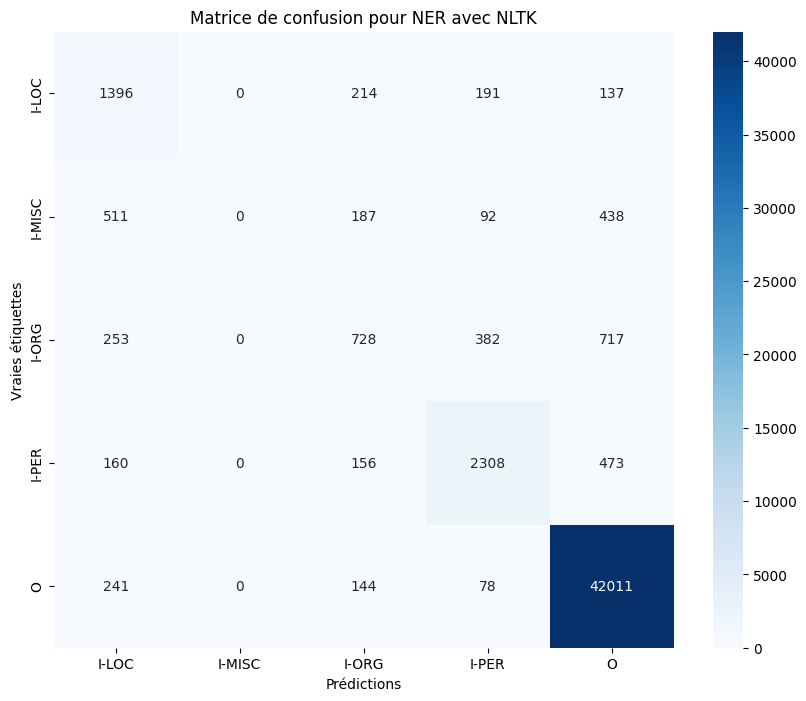

In [67]:
# Matrice de confusion
labels = sorted(list(set(test_tags)))
cm = confusion_matrix(test_tags, nltk_tags_conv, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion pour NER avec NLTK')
plt.show()

## 4. Performances de spaCy pour la NER

**4a.** Le NER de spaCy a aussi un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertir chaque tag du NER de spaCy dans le tag correspondant pour les données de test.  Attention à la logique des conversions. 

In [46]:
def convert_spacy_conll(spacy_tag):
    corresp = {
        'O': 'O',
        'PERSON': 'I-PER',
        'ORG': 'I-ORG',
        'GPE': 'I-LOC',
        'LOC': 'I-LOC',
        'FAC': 'I-LOC',
        'PRODUCT': 'I-MISC',
        'EVENT': 'I-MISC',
        'WORK_OF_ART': 'I-MISC',
        'LAW': 'I-MISC',
        'LANGUAGE': 'I-MISC',
        'NORP': 'I-MISC',
    }

    return corresp.get(spacy_tag, 'O')

**4b.** Veuillez exécuter la NER de spaCy sur chacune des phrases de `test_tokens`, ce qui assure que spaCy aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `spacy_tags`.

In [50]:
spacy_tags = []
for sents in test_tokens:
    chunks = nlp(Doc(nlp.vocab, sents))
    for chunk in chunks:
        if chunk.ent_iob != 2:
            spacy_tags.append(chunk.ent_type_)
        else:
            spacy_tags.append('O')

**4c.** Veuillez convertir les tags de `spacy_tags` grâce à la fonction précédente, dans une liste appelée `spacy_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [51]:
spacy_tags_conv = [convert_spacy_conll(tag) for tag in spacy_tags]
print("Nombre total de tags :", len(spacy_tags_conv))
print("Dix premiers tags :", spacy_tags_conv[:10])

Nombre total de tags : 50817
Dix premiers tags : ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


**4d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

In [52]:
report_spacy_sm = classification_report(test_tags, spacy_tags_conv, zero_division=0, output_dict=True)

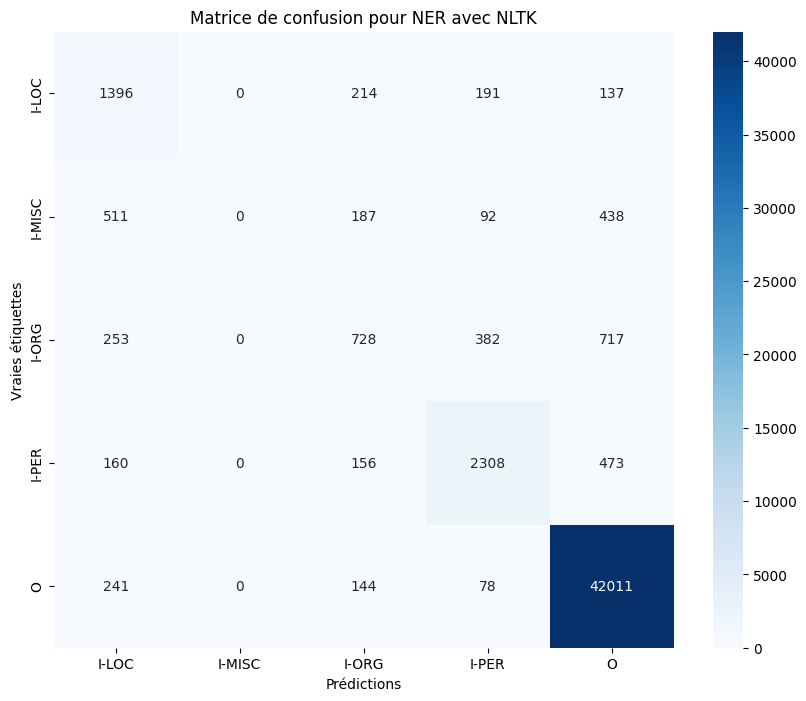

In [53]:
labels = sorted(list(set(test_tags)))
cm = confusion_matrix(test_tags, nltk_tags_conv, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion pour NER avec NLTK')
plt.show()

**4e.** Veuillez exécuter également le modèle 'en_core_web_lg' de spacy et afficher le rapport d'évaluation (il n'est pas demander d'afficher la matrice de confusion).  Vous pouvez recopier ici le minimum de code nécessaire à l'obtention des résultats, avec une nouvelle pipeline spaCy appelée 'nlp2'.

In [56]:
!python -m spacy download en_core_web_lg

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.8.0/en_core_web_lg-3.8.0-py3-none-any.whl (400.7 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [57]:
nlp2 = spacy.load("en_core_web_lg")
spacy_tags2 = []
for sents in test_tokens:
    chunks = nlp2(Doc(nlp2.vocab, sents))
    for chunk in chunks:
        if chunk.ent_iob != 2:
            spacy_tags2.append(chunk.ent_type_)
        else:
            spacy_tags2.append('O')

spacy_tags_conv2 = [convert_spacy_conll(tag) for tag in spacy_tags2]

report_spacy_lg = classification_report(test_tags, spacy_tags_conv2, zero_division=0, output_dict=True)

In [59]:
print(classification_report(test_tags, spacy_tags_conv2, zero_division=0))

              precision    recall  f1-score   support

       I-LOC       0.75      0.87      0.81      1938
      I-MISC       0.84      0.67      0.74      1228
       I-ORG       0.55      0.60      0.58      2080
       I-PER       0.91      0.82      0.86      3097
           O       0.98      0.98      0.98     42474

    accuracy                           0.94     50817
   macro avg       0.81      0.79      0.79     50817
weighted avg       0.94      0.94      0.94     50817



## 5. Utilisation d'embeddings contextualisés fournis par BERT

Dans cette section, vous allez évaluer un modèle basé sur le Transformer, qui fournit des embeddings contextualisés pour chaque token.  Ces embeddings sont ensuite utilisés par une couche finale (appelée _NER head_) pour assigner à chaque token une étiquette indiquant les entités nommées.  Le modèle et les instructions pour l'utiliser sont disponibles ici : https://huggingface.co/dslim/distilbert-NER (il s'agit d'une version de BERT "distillée" dans un modèle plus léger, suivi du _NER head_).

**5a.** Prise en main du modèle : à l'aide des exemples fournis sur Hugging Face, veuillez appliquer DistilBERT_NER sur les 3 premières phrases des données contenues dans `test_tokens` (voir le point 2c) et afficher les résultats obtenus.  Quelles sont les différences avec les résultats de NLTK et de spaCy ?

In [68]:
    # Importer les trois classes, créer le tokenizer, le modèle et la pipeline.
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/distilbert-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)


Device set to use cpu


[{'entity': 'B-PER', 'score': np.float32(0.99110657), 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': np.float32(0.9967968), 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


In [70]:
for i in range(3):
    sentence = ' '.join(test_tokens[i])
    print(f"Phrase {i + 1}: {sentence}")
    results = nlp(sentence)
    print(f"Résultats: {results}")
    print("-" * 50)

Phrase 1: CRICKET - LEICESTERSHIRE TAKE OVER AT TOP AFTER INNINGS VICTORY .
Résultats: [{'entity': 'B-PER', 'score': np.float32(0.7077921), 'index': 6, 'word': 'L', 'start': 10, 'end': 11}, {'entity': 'B-PER', 'score': np.float32(0.66007096), 'index': 7, 'word': '##EI', 'start': 11, 'end': 13}, {'entity': 'B-PER', 'score': np.float32(0.6309051), 'index': 8, 'word': '##CE', 'start': 13, 'end': 15}, {'entity': 'B-PER', 'score': np.float32(0.7143569), 'index': 9, 'word': '##ST', 'start': 15, 'end': 17}, {'entity': 'B-PER', 'score': np.float32(0.7178326), 'index': 10, 'word': '##ER', 'start': 17, 'end': 19}, {'entity': 'B-PER', 'score': np.float32(0.80959857), 'index': 11, 'word': '##S', 'start': 19, 'end': 20}, {'entity': 'B-PER', 'score': np.float32(0.45343474), 'index': 12, 'word': '##H', 'start': 20, 'end': 21}, {'entity': 'B-PER', 'score': np.float32(0.7269442), 'index': 13, 'word': '##IR', 'start': 21, 'end': 23}, {'entity': 'B-PER', 'score': np.float32(0.76244456), 'index': 14, 'wor

**5b.** Le modèle DistilBERT utilise son propre tokeniseur, c'est pourquoi les étiquettes indiquant les entités nommées sont parfois portées par plusieurs *subwords* composant un mot.  Il faut donc parfois agréger une liste d'étiquettes en une seule.  

Veuillez écrire une fonction qui prend en entrée une liste d'étiquettes et retourne une seule étiquette : soit la première, soit celle qui est majoritaire.  Cette fonction sera utilisée plus loin.

In [71]:
from collections import Counter


def tag_fusion(tag_list, method='first'):  # ou method='majority'
    if not tag_list:
        return 'O'

    if method == 'first':
        return tag_list[0]
    elif method == 'majority':
        tag_counts = Counter(tag_list)
        return tag_counts.most_common(1)[0][0]


print(tag_fusion(['O', 'B-PER', 'B-PER'], method='majority'))

B-PER


**5c.** Veuillez afficher le `set` des tags apparaissant dans les résultats de DistilBERT_NER sur les 50 premières phrases du corpus.  Comment se comparent-ils aux tags des données de test CoNLL ?

In [73]:
bert_tags_set = set()
for i in range(50):
    sentence = ' '.join(test_tokens[i])
    results = nlp(sentence)
    for result in results:
        bert_tags_set.add(result['entity'])

print(f"Tags DistilBERT_NER: {sorted(list(bert_tags_set))}")
print(f"Tags du corpus CoNLL: {sorted(list(set(test_tags)))}")

Tags DistilBERT_NER: ['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER']
Tags du corpus CoNLL: ['I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O']


> Les tags DistilBERT NER comportent des balises pour le début d'une entité, là où CoNLL non.

**5d.**  Sur le modèle des points 3a et 4a, veuillez écrire une fonction qui convertit les tags générés par DistilBERT_NER aux tags des donnéees de test.  Vous utiliserez cette fonction plus loin.

In [75]:
def convert_bert_conll(bert_tag):
    corresp = {
        'O': 'O',
        'B-PER': 'I-PER',
        'I-PER': 'I-PER',
        'B-ORG': 'I-ORG',
        'I-ORG': 'I-ORG',
        'B-LOC': 'I-LOC',
        'I-LOC': 'I-LOC',
        'B-MISC': 'I-MISC',
        'I-MISC': 'I-MISC'
    }
    return corresp.get(bert_tag, 'O')

**5e.** La pipeline DistilBERT_NER utilise son propre tokeniseur, qui ne peut pas être changé, car le modèle DistilBERT a été défini et entraîné avec lui.  On doit donc convertir les tokens du modèle à la même tokenisation que celle des données de test, en vue de l'évaluation.  Pour cela, on vous donne la fonction `convert_tokens` ainsi que du code pour la tester.  Veuillez étudier le code pour pouvoir l'utiliser plus bas, puis répondez aux questions ci-après.

In [76]:
def convert_tokens(ref_tokens, bert_result, word_ids):
    tokenized = tokenizer.tokenize(' '.join(ref_tokens))
    all_tags = []
    for tok, i in zip(tokenized, range(len(tokenized))):
        label = [tag['entity'] for tag in bert_result if tag['index'] == i + 1]
        if label:
            label = label[0]
        else:
            label = 'O'
        if tok[:2] == '##' or word_ids[i] == word_ids[i - 1]:
            all_tags[-1].append(label)
        else:
            all_tags.append([label])
    return [tag_fusion(taglist, method='first') for taglist in all_tags]

In [98]:
# Test de la fonction convert_tokens:
i = 1  # choix de la phrase


def print_len(l):
    print(len(l), '--', l)

print_len(test_tokens[i])  # Affichage 1
tokenized_by_bert = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True)
print_len(tokenizer.convert_ids_to_tokens(tokenized_by_bert["input_ids"]))  # Affichage 2
print_len(tokenized_by_bert.word_ids())  # Affichage 3
tagged_by_bert = nlp(' '.join(test_tokens[i]))
print_len(tagged_by_bert)  # Affichage 4
print_len(convert_tokens(test_tokens[i], tagged_by_bert, tokenized_by_bert.word_ids()))  # Affichage 5

35 -- ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
38 -- ['West', 'Indian', 'all', '-', 'round', '##er', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
38 -- [0, 1, 2, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
6 -- [{'entity': 'B-MISC', 'score': np.float32(0.99248767), 'index': 1, 'word': 'West', 'start': 0, 'end': 4}, {'entity': 'I-MISC', 'score': np.float32(0.9836288), 'index': 2, 'word': 'Indian', 'start': 5, 'end': 11}, {'entity': 'B-PER', 's

> Questions
> 1. Que représentent les trois paramètres de convert_tokens ? Définissez-les comme dans une docstring.
> 2. Que représentent les cinq lignes affichées par le code de test ?
> 3. Quels sont les deux problèmes traités par la fonction convert_tokens ?

> Réponses
> 1. Les trois paramètres de convert_tokens sont :
>    - ref_tokens: Any - Tokens de référence dans la phrase originale
>    - bert_result: Any - Résultat de la pipeline NER, qui contient les entités reconnues et leurs indices de départ/fin
>    - word_ids: {__getitem__} - les IDs de chaque token BERT pour faire correspondre aux mots d'origine de la phrase
> 2. Les lignes affichent :
>    - Le nombre de tokens dans la phrase.
>    - Le nombre de tokens après tokenization par BERT. des mots composés seront découpés en plusieurs mots tels que 'all-rounder' → 'all' '-' 'round' '#er'.
>    - L'ID de chaque token BERT, pour ainsi correspondre au mot d'origine. Les quatre IDs pour les mots séparés de 'all-rounder' sont identiques, afin de pouvoir recomposer le mot original.
>    - Les entités NER reconnues par le modèle BERT pour la phrase.
>    - Le contenu de chaque tag NER après avoir été converti depuis le modèle BERT.
> 3. Puisque BERT sépare les tokens en plusieurs sous-mots, il faut les regrouper ensemble.
> Ceux-ci contiennent des formes particulières.
> Effectuer ce mapping inverse (par ex avec '#er') est le premier problème résolu.
> Le deuxième est le choix de tag lors de la fusion de plusieurs d'entre eux.

**5f.** Veuillez effectuer la reconnaissance des entités nommées avec la pipeline DistilBERT_NER et obtenir la liste finale de tags avec les noms convertis à ceux du jeu de référence grâce à `convert_bert_conll`.

In [78]:
#j = 20  # se limiter aux j premières phrases sur les 2970 (utile pendant le développement, mais les utiliser toutes à la fin)
bert_tags_conv = []

for i in range(len(test_tokens)):
    sentence = ' '.join(test_tokens[i])
    tokenized_by_bert = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True)
    bert_results = nlp(sentence)
    converted_tags = convert_tokens(test_tokens[i], bert_results, tokenized_by_bert.word_ids())
    converted_tags = [convert_bert_conll(tag) for tag in converted_tags]
    bert_tags_conv.extend(converted_tags)

print(f"Nombre de tags générés: {len(bert_tags_conv)}")
print(f"Exemples des premiers tags: {bert_tags_conv[:20]}")

Nombre de tags générés: 50817
Exemples des premiers tags: ['O', 'O', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'I-MISC', 'O', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O']


**5g.** En comparant `test_tags` avec `bert_tags_conv`, veuillez afficher le rapport d'évaluation de la classification et la matrice de confusion, pour tous les types de tags apparaissant dans les données de test.

In [79]:
print(classification_report(test_tags, bert_tags_conv, zero_division=0))

              precision    recall  f1-score   support

       I-LOC       0.96      0.96      0.96      1938
      I-MISC       0.91      0.89      0.90      1228
       I-ORG       0.93      0.93      0.93      2080
       I-PER       0.98      0.98      0.98      3097
           O       1.00      1.00      1.00     42474

    accuracy                           0.99     50817
   macro avg       0.95      0.95      0.95     50817
weighted avg       0.99      0.99      0.99     50817



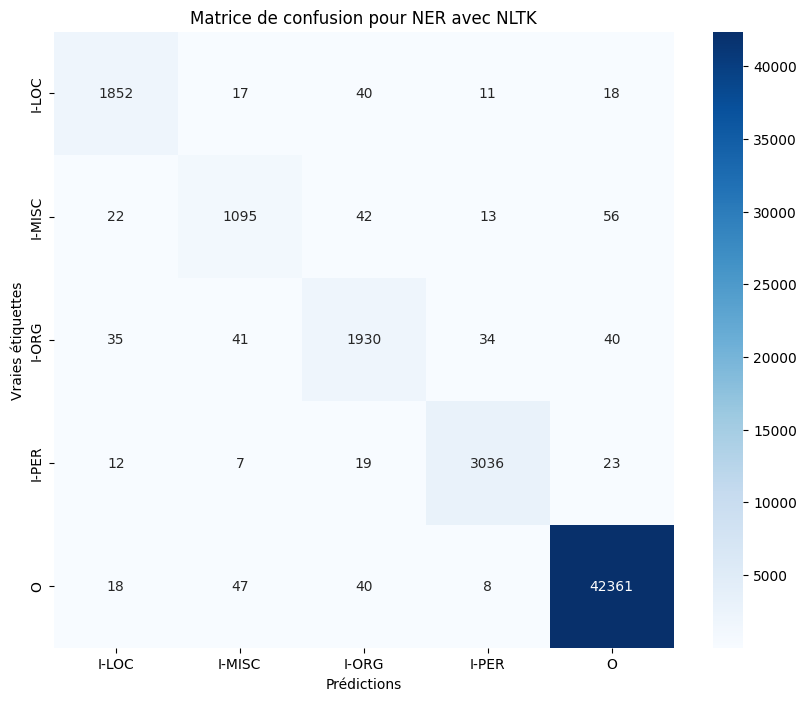

In [80]:
labels = sorted(list(set(test_tags)))
cm = confusion_matrix(test_tags, bert_tags_conv, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion pour NER avec NLTK')
plt.show()

**5h.** Laquelle des deux stratégies de `tag_fusion` (premier tag ou tag majoritaire) conduit à de meilleurs résultats ?  Veuillez effectuer l'expérience et indiquer simplement les scores obtenus et votre conclusion dans le champ suivant.  Pour la conclusion finale, gardez 'first'.

In [81]:
# Comparaison des deux stratégies de tag_fusion
# Stratégie 'first'
bert_tags_conv_first = []

for i in range(len(test_tokens)):
    sentence = ' '.join(test_tokens[i])
    tokenized_by_bert = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True)
    bert_results = nlp(sentence)


    # Utiliser la méthode 'first'
    def tag_fusion_first(tag_list):
        return tag_fusion(tag_list, method='first')


    converted_tags = convert_tokens(test_tokens[i], bert_results, tokenized_by_bert.word_ids())
    converted_tags = [convert_bert_conll(tag) for tag in converted_tags]
    bert_tags_conv_first.extend(converted_tags)

# Stratégie 'majority'
bert_tags_conv_majority = []

for i in range(len(test_tokens)):
    sentence = ' '.join(test_tokens[i])
    tokenized_by_bert = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True)
    bert_results = nlp(sentence)


    def convert_tokens_majority(ref_tokens, bert_result, word_ids):
        tokenized = tokenizer.tokenize(' '.join(ref_tokens))
        all_tags = []
        for tok, i in zip(tokenized, range(len(tokenized))):
            label = [tag['entity'] for tag in bert_result if tag['index'] == i + 1]
            if label:
                label = label[0]
            else:
                label = 'O'
            if tok[:2] == '##' or word_ids[i] == word_ids[i - 1]:
                all_tags[-1].append(label)
            else:
                all_tags.append([label])
        return [tag_fusion(taglist, method='majority') for taglist in all_tags]


    converted_tags = convert_tokens_majority(test_tokens[i], bert_results, tokenized_by_bert.word_ids())
    converted_tags = [convert_bert_conll(tag) for tag in converted_tags]
    bert_tags_conv_majority.extend(converted_tags)

print("Résultats avec la stratégie 'first':")
report_first = classification_report(test_tags, bert_tags_conv_first, zero_division=0, output_dict=True)
print(classification_report(test_tags, bert_tags_conv_first, zero_division=0, digits=5))

print("\nRésultats avec la stratégie 'majority':")
report_majority = classification_report(test_tags, bert_tags_conv_majority, zero_division=0, output_dict=True)
print(classification_report(test_tags, bert_tags_conv_majority, zero_division=0, digits=5))

report_bert = report_first

Résultats avec la stratégie 'first':
              precision    recall  f1-score   support

       I-LOC    0.95513   0.95562   0.95538      1938
      I-MISC    0.90721   0.89169   0.89938      1228
       I-ORG    0.93192   0.92788   0.92990      2080
       I-PER    0.97872   0.98030   0.97951      3097
           O    0.99678   0.99734   0.99706     42474

    accuracy                        0.98931     50817
   macro avg    0.95395   0.95057   0.95225     50817
weighted avg    0.98927   0.98931   0.98929     50817


Résultats avec la stratégie 'majority':
              precision    recall  f1-score   support

       I-LOC    0.95713   0.95614   0.95663      1938
      I-MISC    0.90728   0.89251   0.89984      1228
       I-ORG    0.93188   0.92740   0.92964      2080
       I-PER    0.97839   0.97966   0.97903      3097
           O    0.99678   0.99743   0.99711     42474

    accuracy                        0.98937     50817
   macro avg    0.95429   0.95063   0.95245     50817

> Les résultats obtenus avec 'first' ou 'majority' sont très proches. On parle d'une différence de quelques dixièmes de pourcentage.
> Dans la majeure partie des cas, 'majority' est très légèrement meilleur. Il est quand même plus judicieux d'utiliser la méthode 'first' qui est plus rapide et ne demande pas de faire des calculs supplémentaires.

## 6. Discussion finale

Veuillez comparer les scores des quatre modèles testés, en termes de **macro avg**.  Pourquoi ce score est-il le plus informatif ?  Veuillez indiquer également la taille des modèles spaCy évalués.

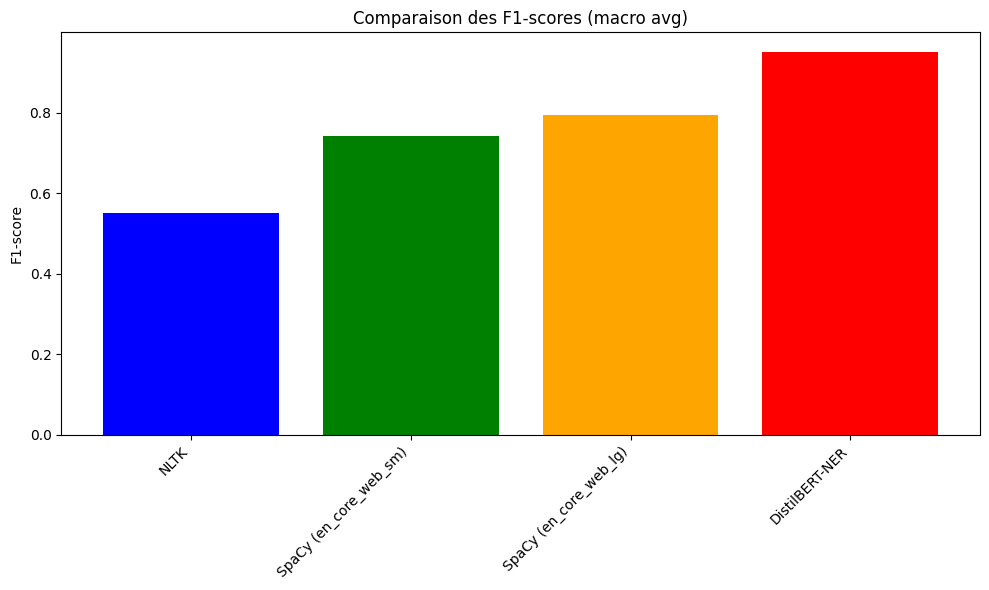

In [95]:
import pandas as pd

models = ['NLTK', 'SpaCy (en_core_web_sm)', 'SpaCy (en_core_web_lg)', 'DistilBERT-NER']
precision = []
recall = []
f1_score = []

precision.append(report_nltk['macro avg']['precision'])
recall.append(report_nltk['macro avg']['recall'])
f1_score.append(report_nltk['macro avg']['f1-score'])

precision.append(report_spacy_sm['macro avg']['precision'])
recall.append(report_spacy_sm['macro avg']['recall'])
f1_score.append(report_spacy_sm['macro avg']['f1-score'])

precision.append(report_spacy_lg['macro avg']['precision'])
recall.append(report_spacy_lg['macro avg']['recall'])
f1_score.append(report_spacy_lg['macro avg']['f1-score'])

precision.append(report_bert['macro avg']['precision'])
recall.append(report_bert['macro avg']['recall'])
f1_score.append(report_bert['macro avg']['f1-score'])

plt.figure(figsize=(10, 6))
plt.bar(models, f1_score, color=['blue', 'green', 'orange', 'red'])
plt.title('Comparaison des F1-scores (macro avg)')
plt.ylabel('F1-score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [96]:
import os
import spacy

# en_core_web_sm
nlp_sm = spacy.load("en_core_web_sm")
sm_path = nlp_sm.path
sm_size = sum(os.path.getsize(os.path.join(sm_path, f)) for f in os.listdir(sm_path)
              if os.path.isfile(os.path.join(sm_path, f)))

# en_core_web_lg
nlp_lg = spacy.load("en_core_web_lg")
lg_path = nlp_lg.path
lg_size = sum(os.path.getsize(os.path.join(lg_path, f)) for f in os.listdir(lg_path)
              if os.path.isfile(os.path.join(lg_path, f)))

# DistilBERT model
model = AutoModelForTokenClassification.from_pretrained("dslim/distilbert-NER")
model_path = model.config._name_or_path
model_size = model.get_memory_footprint() / 1024 / 1024  # Convert bytes to MB

comparison = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score,
    'Model size': [
        "/",
        f"{sm_size / 1024 / 1024:.2f} MB",
        f"{lg_size / 1024 / 1024:.2f} MB",
        f"{model_size:.2f} MB"]
})

print(comparison)

                    Model  Precision    Recall  F1-score Model size
0                    NLTK   0.554140  0.560933  0.552099          /
1  SpaCy (en_core_web_sm)   0.762097  0.727143  0.743234    0.10 MB
2  SpaCy (en_core_web_lg)   0.807131  0.787441  0.793691    0.11 MB
3          DistilBERT-NER   0.953951  0.950569  0.952246  248.71 MB


> Dans notre cas, le score macro average est particulièrement pertinent, car il calcule une moyenne simple des performances sur toutes les classes, sans tenir compte de leur proportion respective dans le jeu de données. Une moyenne pondérée est fortement influencée par une classe majoritaire et ne reflèterait pas correctement la qualité de la détection sur les autres classes.

> L'utilisation du macro average permet donc d'évaluer plus équitablement la capacité de chaque modèle à reconnaître les différentes entités, quelle que soit leur fréquence.

> En analysant les résultats obtenus :

 - DistilBERT se distingue nettement avec un F1-score de 0.95. Grâce à son architecture basée sur les transformers et son pré-entraînement sur un corpus similaire CoNLL-03, il capture mieux les dépendances contextuelles entre les mots, ce qui explique ses excellentes performances. Toutefois, puisque le modèle a été pré-entraîné sur un corpus proche de celui utilisé pour notre évaluation, son score pourrait surestimer ses capacités de généralisation sur d'autres types de données.

 - spaCy propose des résultats corrects avec un F1-score de 0.74 pour le modèle en_core_web_sm et 0.79 pour en_core_web_lg. Le modèle lg n’apporte pas une performance proportionnelle à son poids plus important. De plus, les scores obtenus sont légèrement en dessous de ceux annoncés dans la documentation officielle.

 - NLTK affiche la performance la plus modeste avec un F1-score de 0.55. Cela s'explique par le fait que son modèle repose sur des méthodes de machine learning classiques, sans utiliser d’architectures modernes comme led réseaux de neurones profonds. De plus, le volume et la nature du corpus utilisé pour son entraînement limitent sa capacité à généraliser sur un nouveau set de données.